In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df = pd.read_csv("diamonds.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [24]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorial_feature = [feature for feature in df.columns if feature not in numerical_feature]

print(f"Number of numerical features are: {len(numerical_feature)}")
print(f"Number of discrete features are: {len(discrete_feature)}")
print(f"Number of continuous features are: {len(continuous_feature)}")
print(f"Number of categorical features are: {len(categorial_feature)}")

Number of numerical features are: 7
Number of discrete features are: 0
Number of continuous features are: 7
Number of categorical features are: 3


In [25]:
df.isnull().sum()*100/len(df)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [26]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [27]:
for feature in categorial_feature:
    print(f"Unique values in {feature} are {df[feature].unique()}")

Unique values in cut are ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in color are ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in clarity are ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


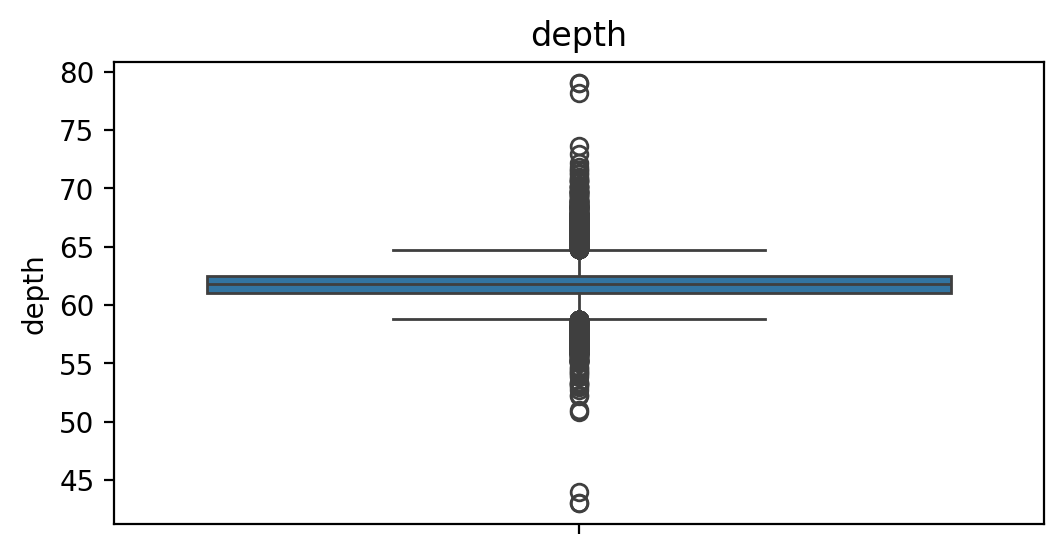

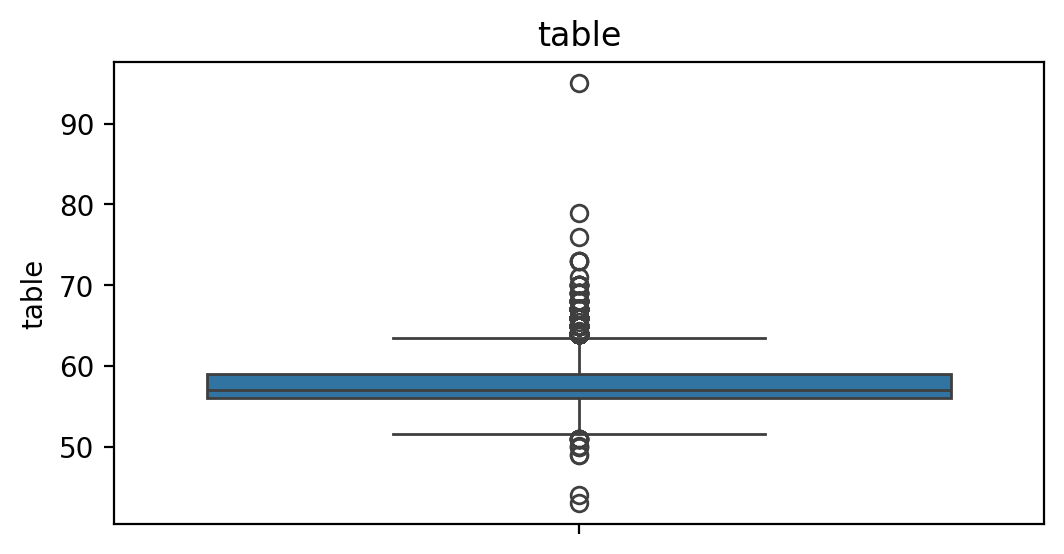

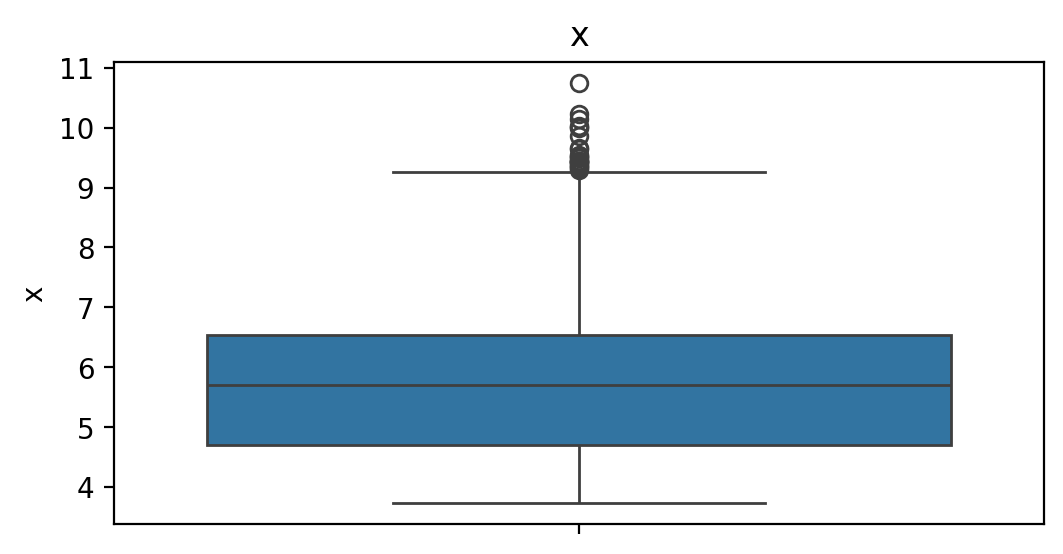

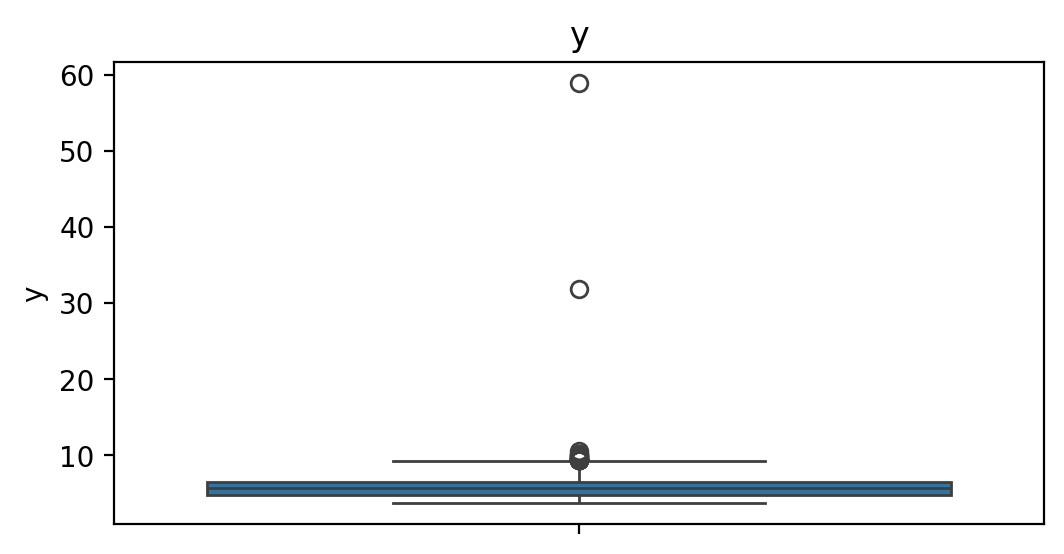

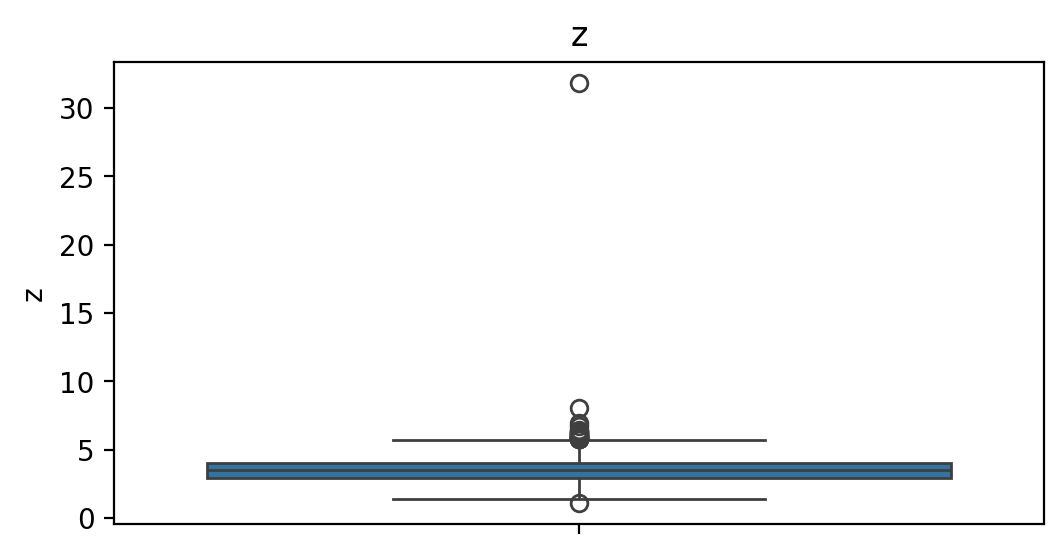

In [28]:
for feature in continuous_feature:
    if feature == "carat" or "price" == feature:
        continue
    plt.figure(figsize=(6,3), dpi=200)
    sns.boxplot(df[feature])
    plt.title(feature)

# sns.boxplot(df["carat"])

In [30]:
for feature in continuous_feature:
    if feature == "carat" or "price" == feature:
        continue

    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_bridge = df[feature].quantile(0.25) - (IQR*1.5)
    upper_bridge = df[feature].quantile(0.75) + (IQR*1.5)
    df.loc[df[feature] <= lower_bridge, feature] = lower_bridge
    df.loc[df[feature] >= upper_bridge, feature] = upper_bridge

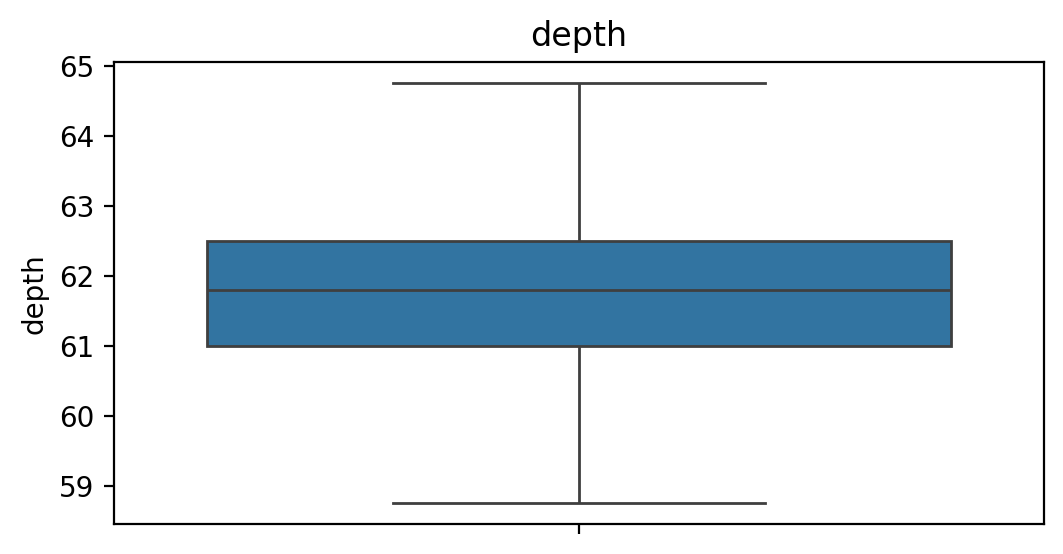

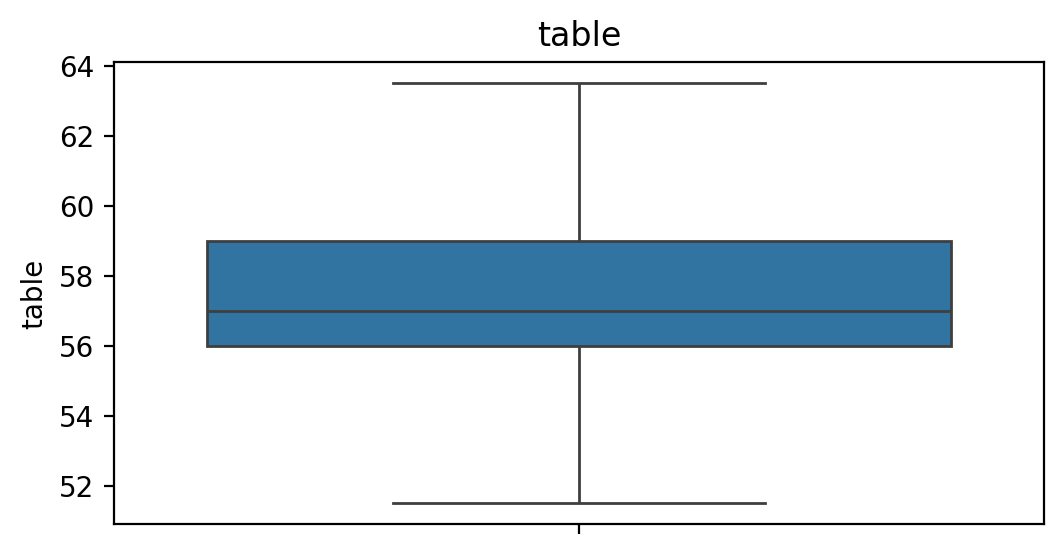

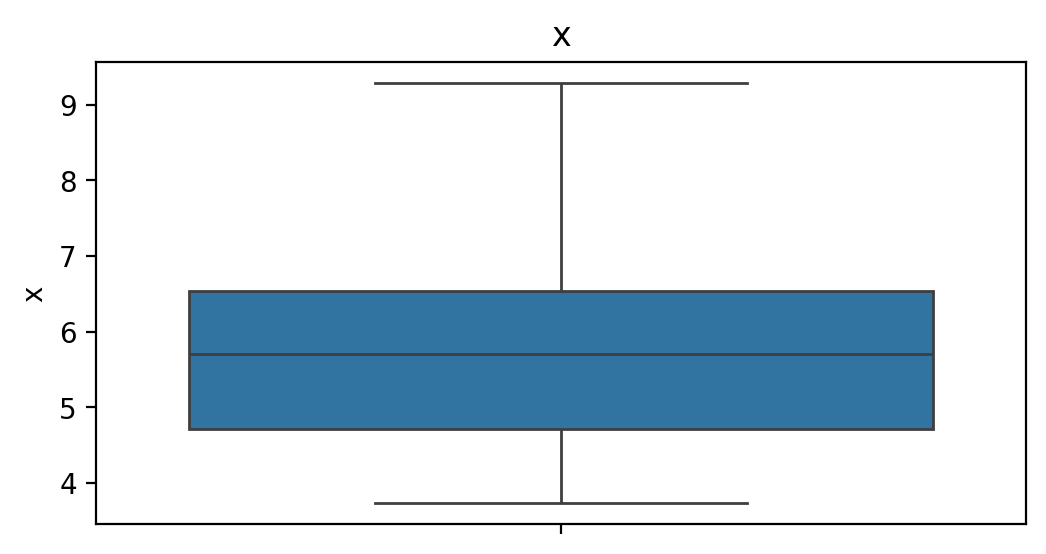

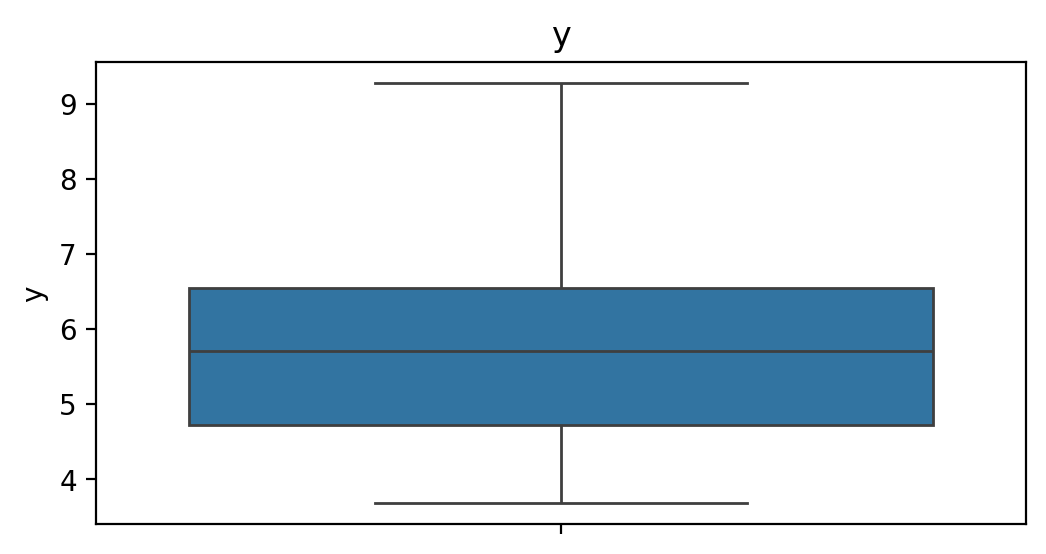

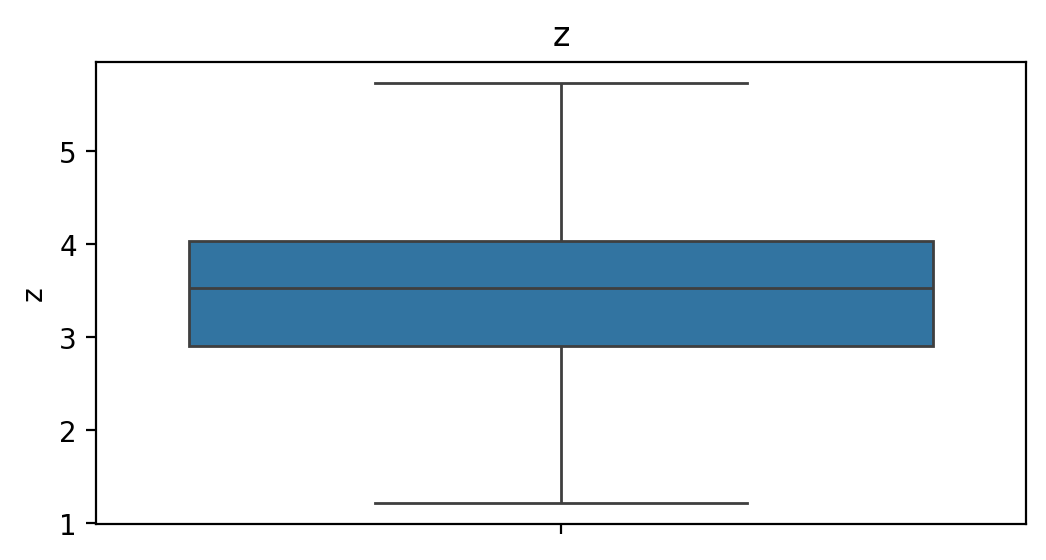

In [31]:
for feature in continuous_feature:
    if feature == "carat" or "price" == feature:
        continue
    plt.figure(figsize=(6,3), dpi=200)
    sns.boxplot(df[feature])
    plt.title(feature)


In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for feature in categorial_feature:
    df[feature] = encoder.fit_transform(df[feature])

In [33]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.80,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,58.75,63.5,327,4.05,4.07,2.31
3,0.29,3,5,5,62.40,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.30,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.80,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.10,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.80,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.00,58.0,2757,6.15,6.12,3.74


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.200,0.40,0.70,1.04,5.010
cut,53920.0,2.553079,1.027705,0.000,2.00,2.00,3.00,4.000
color,53920.0,2.594028,1.701272,0.000,1.00,3.00,4.00,6.000
clarity,53920.0,3.835441,1.724549,0.000,2.00,4.00,5.00,7.000
depth,53920.0,61.749229,1.269961,58.750,61.00,61.80,62.50,64.750
table,53920.0,57.438270,2.160902,51.500,56.00,57.00,59.00,63.500
price,53920.0,3930.993231,3987.280446,326.000,949.00,2401.00,5323.25,18823.000
x,53920.0,5.731463,1.118851,3.730,4.71,5.70,6.54,9.285
y,53920.0,5.733413,1.110978,3.680,4.72,5.71,6.54,9.270
z,53920.0,3.539362,0.691175,1.215,2.91,3.53,4.04,5.735


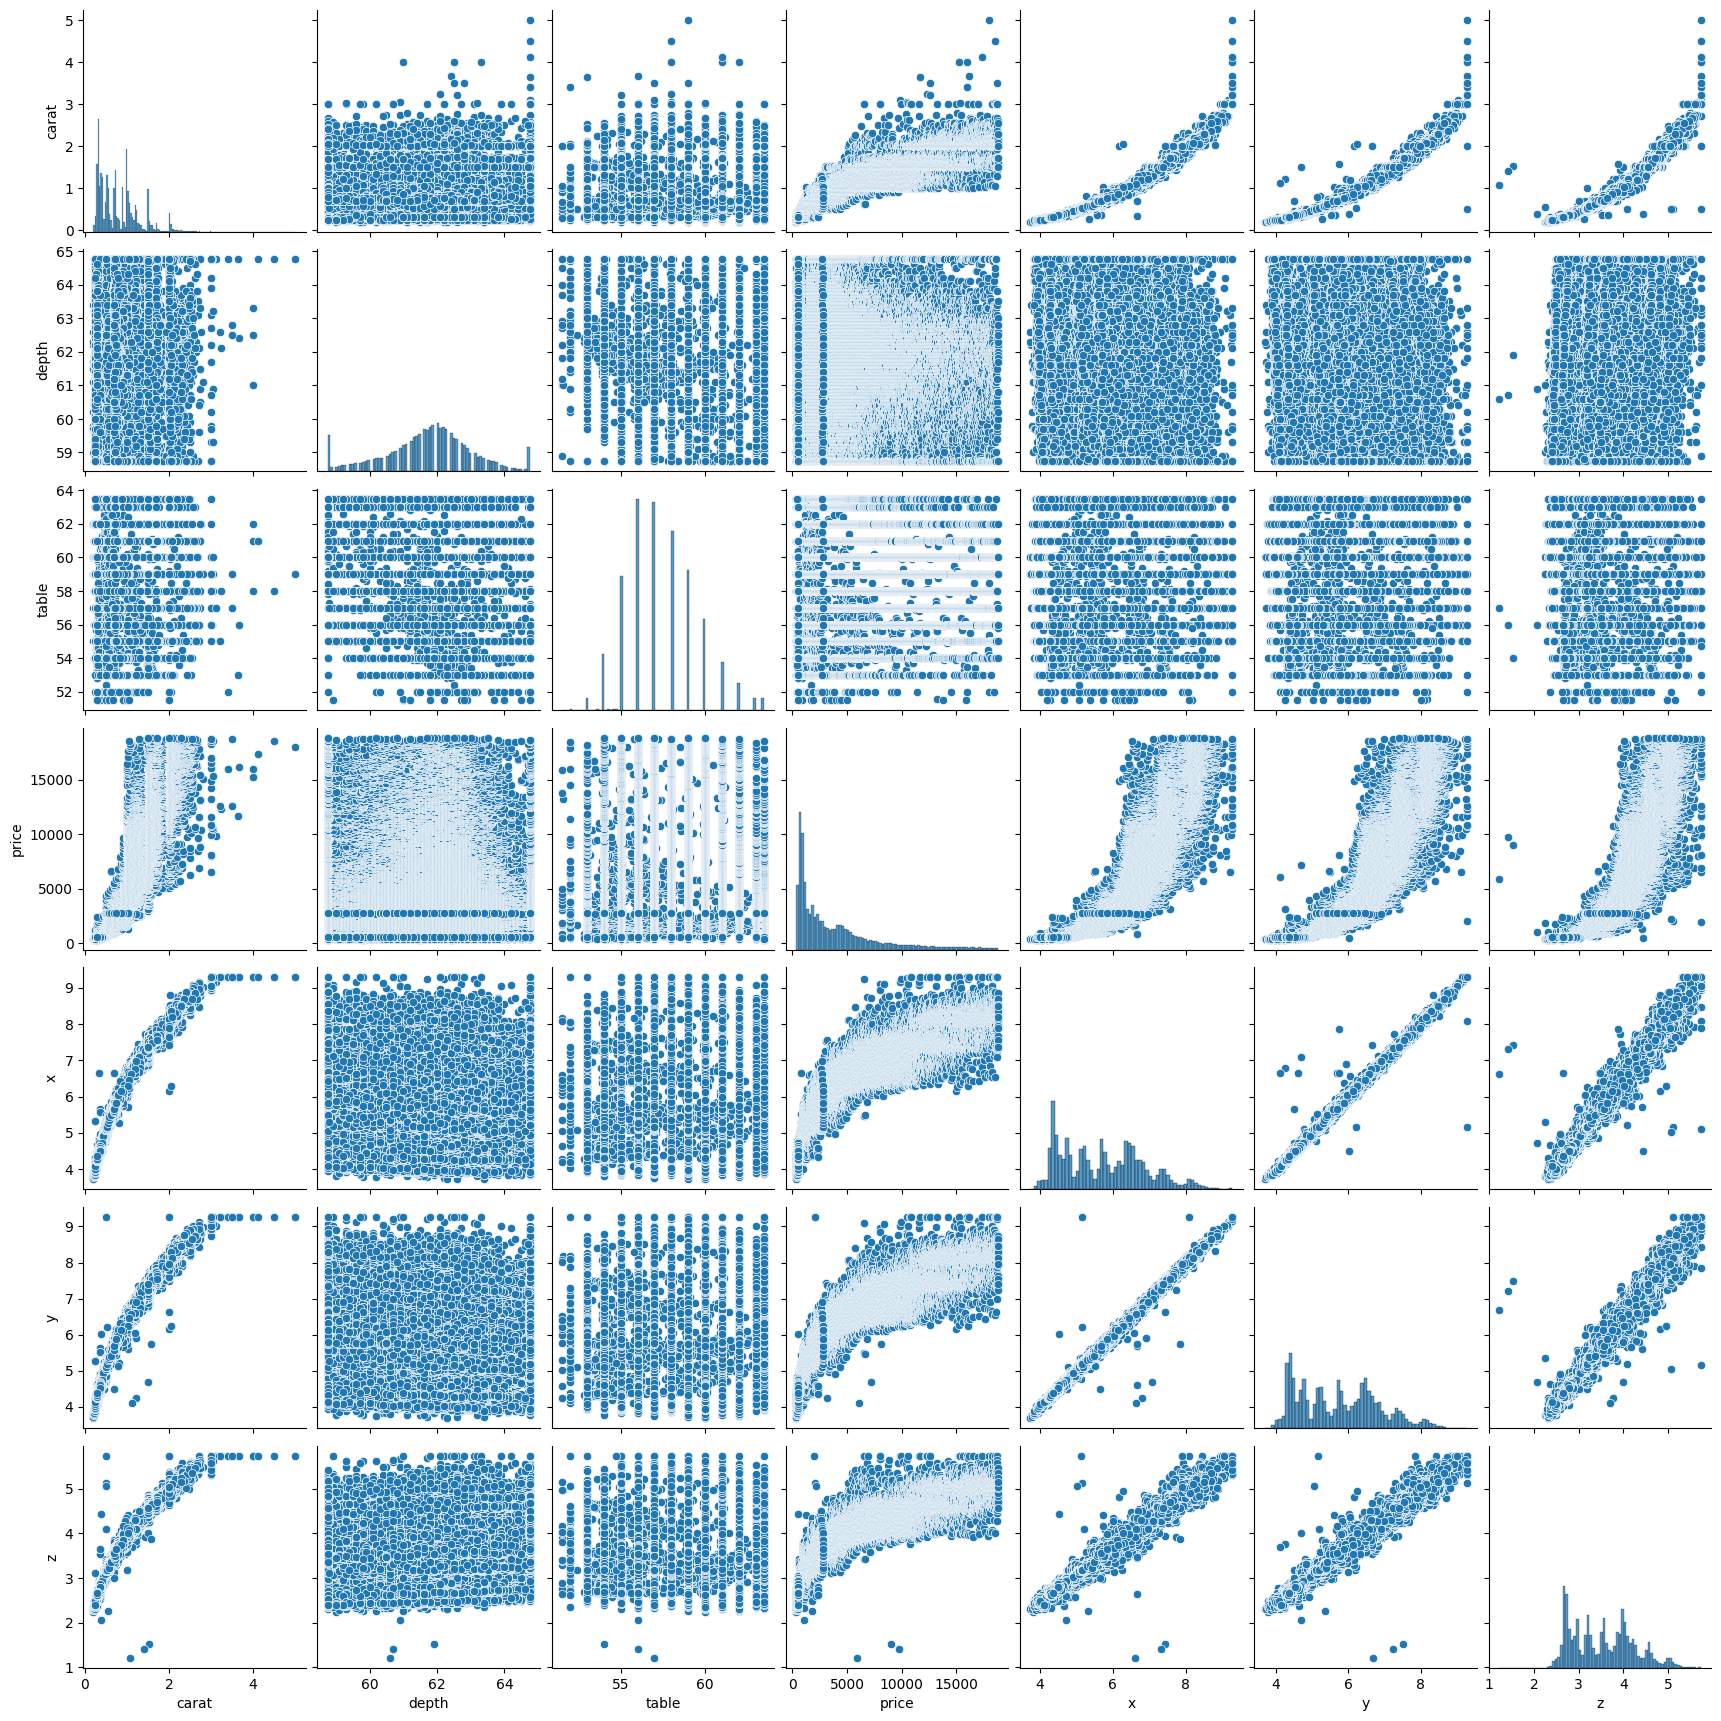

In [35]:
sns.pairplot(data=df[numerical_feature])

<Axes: >

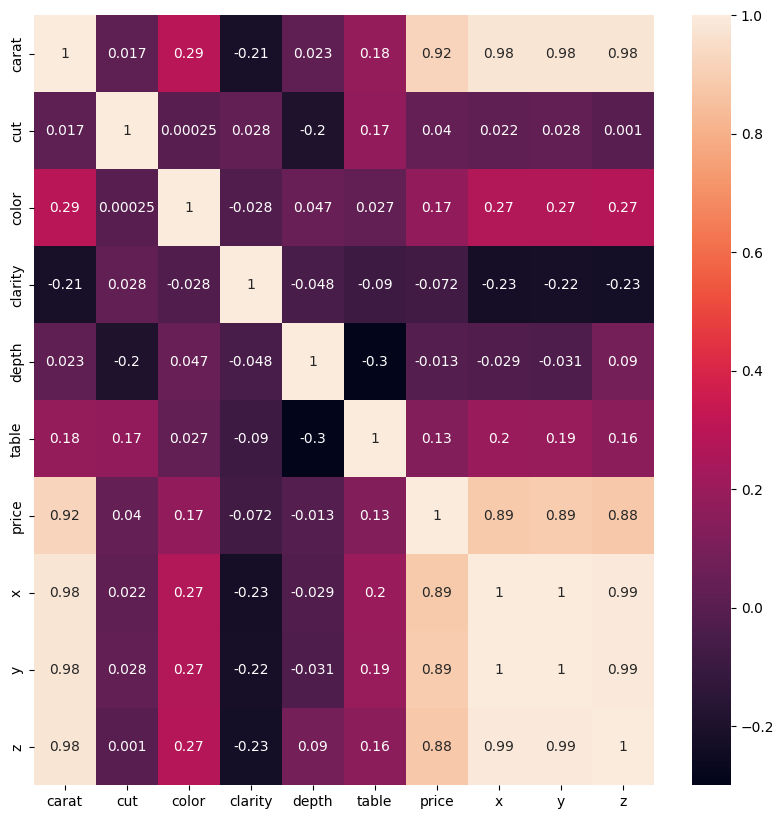

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True)

<hr>

# Linear Regression

In [37]:
X = df.drop("price", axis=1)
y = df["price"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(scaled_X_train, y_train)

LinearRegression()

In [41]:
y_preds = linear_model.predict(scaled_X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_preds)

861.0015594990064

In [43]:
np.sqrt(mean_squared_error(y_test, y_preds))

1333.3913295857585

<hr>

# K nearest neighbors

In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [46]:
y_preds = knn.predict(scaled_X_test)

mean_absolute_error(y_test, y_preds)

420.03047725024726

In [47]:
np.sqrt(mean_squared_error(y_test, y_preds))

831.0507150955535

<hr>

# Support Vector Regressor

In [48]:
from sklearn.svm import SVR 

svr = SVR()

svr.fit(scaled_X_train, y_train)

SVR()

In [49]:
y_preds = svr.predict(scaled_X_test)

In [53]:
mean_absolute_error(y_test, y_preds)

1405.143605070083

In [51]:
np.sqrt(mean_squared_error(y_test, y_preds))

2865.865332985352